# A Place for Salvador Allende: Data Visualizations

## Data preparation

In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# import our investigation table
allende = pd.read_excel('a_place_for_salvador_allende_investigation.xlsx', header=0, index_col=0, true_values=[float(1),int(1.0)])
allende.head(5)

,name,type,region,country,locale_1,locale_2,locale_3,locale_4,locale_5,zip_code,...,former_name,verified_in_maps,openstreetmap_link,google_maps_link,abacq_reference,socialist_influence,democrat_influence,chilean_influence,how_allende_died,erratum
id,,,,,,,,,,,,,,,,,,,,,
1,Salvador Allende,street,South America,Chile,Los Lagos,Chiloé,Ancud,Bórquez Solar,NaN,5710000,...,NaN,1,https://www.openstreetmap.org/way/795668829,https://goo.gl/maps/47DsF1gVCfG7i5g7A,http://www.abacq.org/calle/index.php?2007/02/1...,0,0,1,NaN,0
2,Plaza Salvador Allende,park,South America,Chile,Biobío,Concepción,Lota,NaN,NaN,4190000,...,NaN,1,https://www.openstreetmap.org/way/566237673,https://goo.gl/maps/M6LT2AqH6cZfBaLe6,http://www.abacq.org/calle/index.php?2013/06/2...,0,0,1,NaN,0
3,Plaza Mirador Salvador Allende,park,South America,Chile,Biobío,Concepción,Lota,Colcura,NaN,NaN,...,NaN,0,NaN,NaN,http://www.abacq.org/calle/index.php?2007/02/1...,0,0,1,NaN,0
4,Pasaje Allende,street,South America,Chile,Región Metropolitana,Santiago,Santiago,NaN,NaN,8370403,...,NaN,1,https://www.openstreetmap.org/way/300049158,https://goo.gl/maps/DZFGaGnNi1utVVgR8,http://www.abacq.org/calle/index.php?2012/12/0...,0,0,1,NaN,0
5,Monumento al último discurso de Salvador Allende,monument,South America,Chile,Región Metropolitana,Santiago,San Joaquín,NaN,NaN,NaN,...,NaN,1,NaN,https://goo.gl/maps/7u9Zo6Q9TdySTihPA,http://www.abacq.org/calle/index.php?2011/06/2...,0,0,1,NaN,0


In [2]:
# create a separate table for all extant places
# "extant" here means it is currently named after Salvador Allende
# AND it is verified in at least one map service

allende_extant = allende[~allende['former_name'].str.contains('Allende', na=False)]
allende_extant = allende_extant[allende_extant['verified_in_maps'] == 1]
allende_extant.head(5)

,name,type,region,country,locale_1,locale_2,locale_3,locale_4,locale_5,zip_code,...,former_name,verified_in_maps,openstreetmap_link,google_maps_link,abacq_reference,socialist_influence,democrat_influence,chilean_influence,how_allende_died,erratum
id,,,,,,,,,,,,,,,,,,,,,
1,Salvador Allende,street,South America,Chile,Los Lagos,Chiloé,Ancud,Bórquez Solar,NaN,5710000,...,NaN,1,https://www.openstreetmap.org/way/795668829,https://goo.gl/maps/47DsF1gVCfG7i5g7A,http://www.abacq.org/calle/index.php?2007/02/1...,0,0,1,NaN,0
2,Plaza Salvador Allende,park,South America,Chile,Biobío,Concepción,Lota,NaN,NaN,4190000,...,NaN,1,https://www.openstreetmap.org/way/566237673,https://goo.gl/maps/M6LT2AqH6cZfBaLe6,http://www.abacq.org/calle/index.php?2013/06/2...,0,0,1,NaN,0
4,Pasaje Allende,street,South America,Chile,Región Metropolitana,Santiago,Santiago,NaN,NaN,8370403,...,NaN,1,https://www.openstreetmap.org/way/300049158,https://goo.gl/maps/DZFGaGnNi1utVVgR8,http://www.abacq.org/calle/index.php?2012/12/0...,0,0,1,NaN,0
5,Monumento al último discurso de Salvador Allende,monument,South America,Chile,Región Metropolitana,Santiago,San Joaquín,NaN,NaN,NaN,...,NaN,1,NaN,https://goo.gl/maps/7u9Zo6Q9TdySTihPA,http://www.abacq.org/calle/index.php?2011/06/2...,0,0,1,NaN,0
6,Avenida Salvador Allende Gossens,street,South America,Chile,Tarapacá,Iquique,Iquique,NaN,NaN,1100026,...,Avenida Pedro Prado,1,https://www.openstreetmap.org/way/530881108,https://goo.gl/maps/pjKHFejdxyfjpZXg7,http://www.abacq.org/calle/index.php?2008/09/0...,0,0,1,NaN,0


In [3]:
# quick view of columns and data types
allende.info()
print('\n----------\n')
allende_extant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783 entries, 1 to 783
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 783 non-null    object 
 1   type                 783 non-null    object 
 2   region               783 non-null    object 
 3   country              783 non-null    object 
 4   locale_1             783 non-null    object 
 5   locale_2             774 non-null    object 
 6   locale_3             761 non-null    object 
 7   locale_4             670 non-null    object 
 8   locale_5             524 non-null    object 
 9   zip_code             714 non-null    object 
 10  latitude             747 non-null    float64
 11  longitude            747 non-null    float64
 12  oldest_known_year    783 non-null    int64  
 13  oldest_known_month   734 non-null    float64
 14  oldest_known_day     565 non-null    float64
 15  oldest_known_source  783 non-null    object 


## Number of extant places by `region`

[('Europe', 592), ('South America', 106), ('North America', 14), ('Central America', 10), ('Africa', 7), ('Middle East', 2), ('AU, NZ and Oceania', 1)]
['Europe', 'South America', 'North America', 'Central America', 'Africa', 'Middle East', 'AU, NZ and Oceania']
[592, 106, 14, 10, 7, 2, 1]
['Europe\n592', 'South America\n106', 'North America\n14', 'Central America\n10', 'Africa\n7', 'Middle East\n2', 'AU, NZ and Oceania\n1']


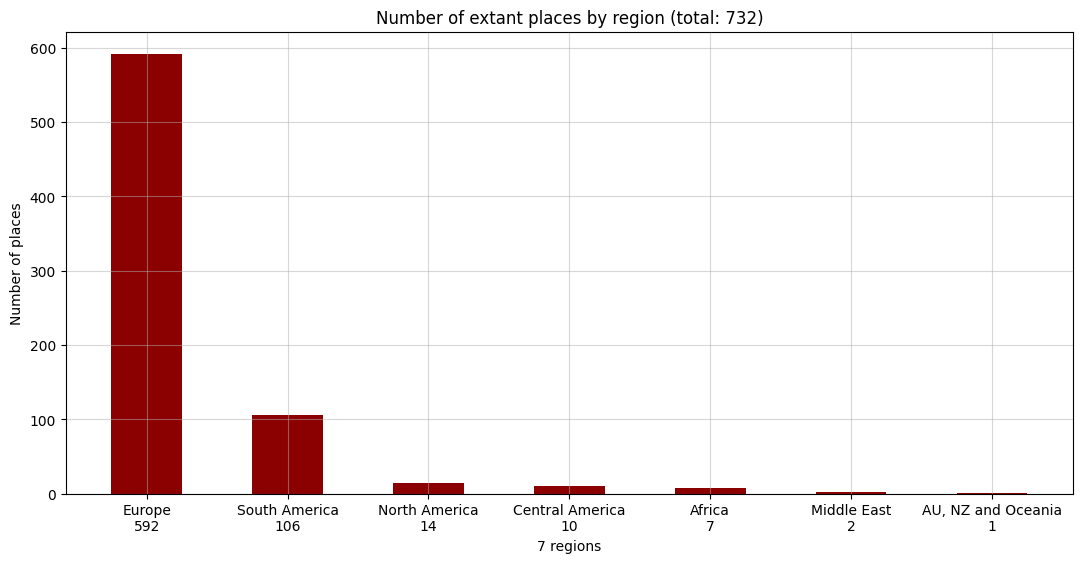

In [4]:
# count number of places per region and sort from greatest to least
regions_count_list = Counter(allende_extant['region'].to_list()).most_common()
print(regions_count_list)

# extract unique regions and counts
regions = []
regions_count = []
regions_label = []
for (r, c) in regions_count_list:
    regions.append(r)
    regions_count.append(c)
    regions_label.append(f'{r}\n{c}')
print(regions)
print(regions_count)
print(regions_label)

# now create the chart
plt.figure(figsize=(13,6))
plt.bar(regions_label, regions_count, color="DarkRed", width=0.5)
plt.grid(alpha=0.5)
plt.title(f'Number of extant places by region (total: {len(allende_extant.index)})')
plt.xlabel(f'{len(regions)} regions')
plt.ylabel('Number of places')
plt.show()

### Excluding France

[('Europe', 186), ('South America', 105), ('North America', 14), ('Central America', 8), ('Africa', 3), ('Middle East', 2), ('AU, NZ and Oceania', 1)]
['Europe', 'South America', 'North America', 'Central America', 'Africa', 'Middle East', 'AU, NZ and Oceania']
[186, 105, 14, 8, 3, 2, 1]
['Europe\n186', 'South America\n105', 'North America\n14', 'Central America\n8', 'Africa\n3', 'Middle East\n2', 'AU, NZ and Oceania\n1']


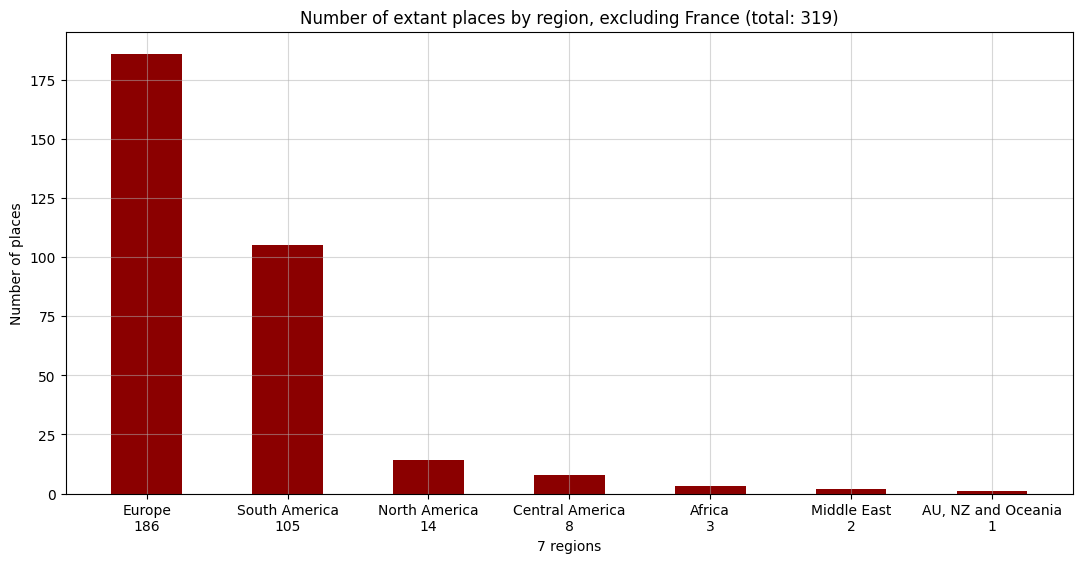

In [5]:
# EXTANT PLACES OUTSIDE FRANCE
extant_non_france = allende_extant[allende_extant['country'] != 'France']
extant_non_france_count = len(extant_non_france.index)
# print(extant_non_france)

# count number of places per region and sort from greatest to least
regions_count_list_non_france = Counter(extant_non_france['region'].to_list()).most_common()
print(regions_count_list_non_france)

# extract unique regions and counts
regions_non_france = []
regions_count_non_france = []
regions_label_non_france = []
for (r, c) in regions_count_list_non_france:
    regions_non_france.append(r)
    regions_count_non_france.append(c)
    regions_label_non_france.append(f'{r}\n{c}')
print(regions_non_france)
print(regions_count_non_france)
print(regions_label_non_france)

# now create the chart
plt.figure(figsize=(13,6))
plt.bar(regions_label_non_france, regions_count_non_france, color="DarkRed", width=0.5)
plt.grid(alpha=0.5)
plt.title(f'Number of extant places by region, excluding France (total: {len(extant_non_france.index)})')
plt.xlabel(f'{len(regions_non_france)} regions')
plt.ylabel('Number of places')
plt.show()

## Number of extant places by `country`

[('France', 413), ('Chile', 79), ('Italy', 61), ('Spain', 52), ('Germany', 24), ('Belgium', 13), ('Portugal', 11), ('Mexico', 9), ('Netherlands', 7), ('Ecuador', 6), ('Venezuela', 6), ('Cuba', 5), ('Hungary', 5), ('Argentina', 4), ('Austria', 4), ('Brazil', 4), ('Canada', 4), ('Peru', 3), ('Serbia', 3), ('Luxembourg', 2), ('Nicaragua', 2), ('Uruguay', 2), ('Algeria', 1), ('Angola', 1), ('Australia', 1), ('Colombia', 1), ('Denmark', 1), ('El Salvador', 1), ('Mozambique', 1), ('Palestine', 1), ('Russia', 1), ('Slovakia', 1), ('Türkiye', 1), ('United Kingdom', 1), ('United States', 1)]
['France', 'Chile', 'Italy', 'Spain', 'Germany', 'Belgium', 'Portugal', 'Mexico', 'Netherlands', 'Ecuador', 'Venezuela', 'Cuba', 'Hungary', 'Argentina', 'Austria', 'Brazil', 'Canada', 'Peru', 'Serbia', 'Luxembourg', 'Nicaragua', 'Uruguay', 'Algeria', 'Angola', 'Australia', 'Colombia', 'Denmark', 'El Salvador', 'Mozambique', 'Palestine', 'Russia', 'Slovakia', 'Türkiye', 'United Kingdom', 'United States']
[41

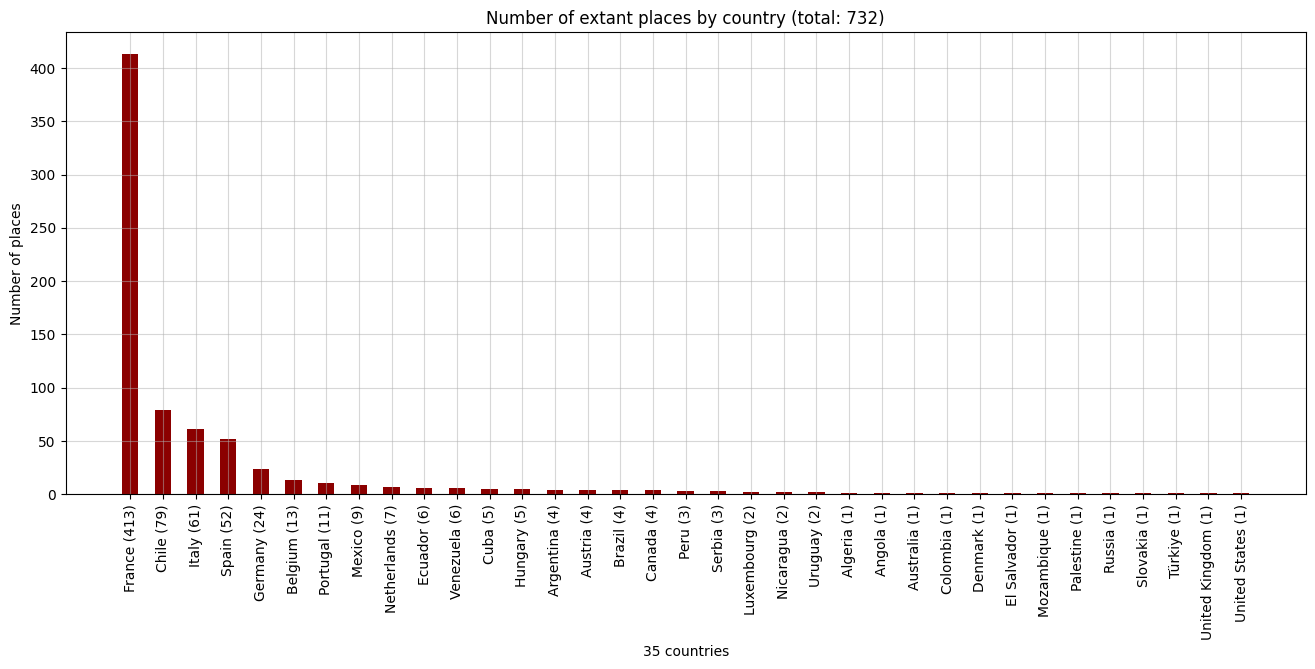

In [6]:
# sort alphabetically by country
allende_extant.sort_values('country', inplace=True)

# count number of places per country and sort from greatest to least
countries_count_list = Counter(allende_extant['country'].to_list()).most_common()
print(countries_count_list)

# extract unique countries and counts
countries = []
countries_count = []
countries_label = []
for (r, c) in countries_count_list:
    countries.append(r)
    countries_count.append(c)
    countries_label.append(f'{r} ({c})')
print(countries)
print(countries_count)
print(countries_label)

# now create the chart
plt.figure(figsize=(16,6))
plt.bar(countries_label, countries_count, color="DarkRed", width=0.5)
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.title(f'Number of extant places by country (total: {len(allende_extant.index)})')
plt.xlabel(f'{len(countries)} countries')
plt.ylabel('Number of places')
plt.show()

### Chile vs. rest of the world

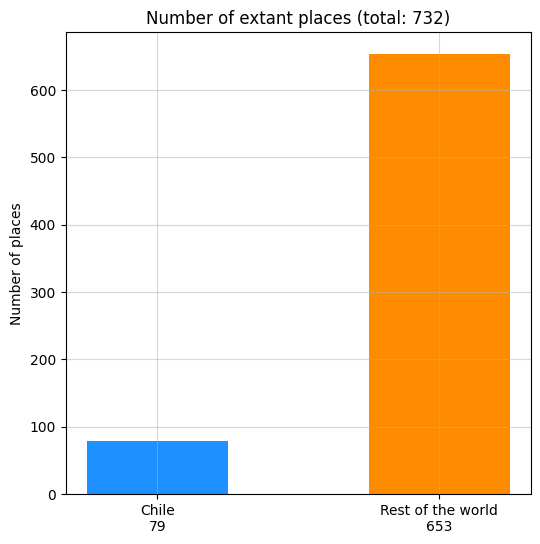

In [7]:
# EXTANT PLACES IN CHILE
extant_chile = allende_extant[allende_extant['country'] == 'Chile']
extant_chile_count = len(extant_chile.index)
# print(extant_chile)

# EXTANT PLACES OUTSIDE CHILE
extant_non_chile = allende_extant[allende_extant['country'] != 'Chile']
extant_non_chile_count = len(extant_non_chile.index)
# print(extant_non_chile)

# default color scheme for Chile vs. Rest of the world
colors_chile_vs_world = ["DodgerBlue", "DarkOrange", "ForestGreen"]

# now create the chart
plt.figure(figsize=(6,6))
plt.bar([f'Chile\n{extant_chile_count}', f'Rest of the world\n{extant_non_chile_count}'], 
        [extant_chile_count, extant_non_chile_count], color=colors_chile_vs_world, width=0.5)
plt.grid(alpha=0.5)
plt.title(f'Number of extant places (total: {len(allende_extant.index)})')
plt.ylabel('Number of places')
plt.show()

### Chile vs. France vs. rest of the world

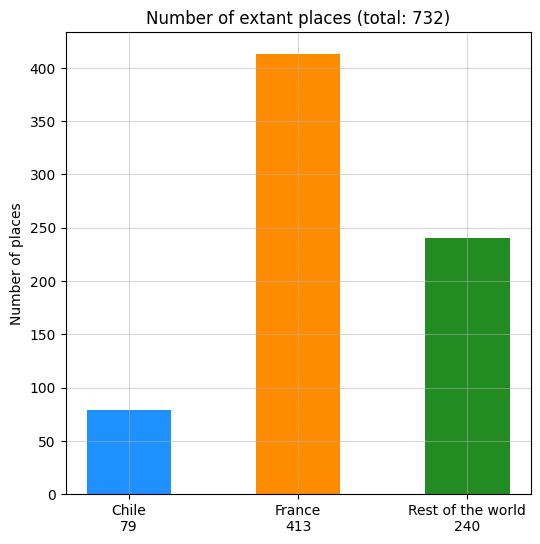

In [8]:
# EXTANT PLACES IN FRANCE
extant_france = allende_extant[allende_extant['country'] == 'France']
extant_france_count = len(extant_france.index)
# print(extant_france)

# EXTANT PLACES OUTSIDE CHILE AND FRANCE
extant_non_chile_france = extant_non_chile[extant_non_chile['country'] != 'France']
extant_non_chile_france_count = len(extant_non_chile_france.index)

# now create the chart
plt.figure(figsize=(6,6))
plt.bar([f'Chile\n{extant_chile_count}', f'France\n{extant_france_count}', f'Rest of the world\n{extant_non_chile_france_count}'], 
        [extant_chile_count, extant_france_count, extant_non_chile_france_count], color=colors_chile_vs_world, width=0.5)
plt.grid(alpha=0.5)
plt.title(f'Number of extant places (total: {len(allende_extant.index)})')
plt.ylabel('Number of places')
plt.show()

## Map of extant places in the world

[-73.8295969310858, -73.157054502095, -70.6594003249177, -70.6280947639119, -70.1338750073244, -70.1348352380915, -71.5963477657418, -70.5818779780898, -70.632726420451, -70.3962324403391, -70.39207, -72.9564810396134, -70.7330572644978, -70.75616, -73.153506188915, -70.6533997359806, -69.321770831375, -70.0459264638867, -71.6135618662188, -72.4247962090149, -68.9087923972965, -71.3620668711463, -70.672263404858, -71.6429787679649, -70.7053971905167, -70.7008855359777, -70.768682953129, -70.5869272714999, -70.6385178969369, -70.4726222756861, -71.3381625279867, -70.6617850699904, -70.6534819961992, -70.6534274822897, -70.639595661822, -70.64776, -70.6479787011878, -71.20121, -73.3468310627004, -73.3466218122592, -70.9557128154493, -71.5040303310156, -70.9557429495052, -70.6996479955628, -70.665946511981, -70.7438437132519, -70.7344047015158, -71.1764968974887, 55.3284533274944, -70.6903934784516, -52.3098944800702, -70.6937373743968, -70.7409855086215, -70.7381239971605, -70.6421504446

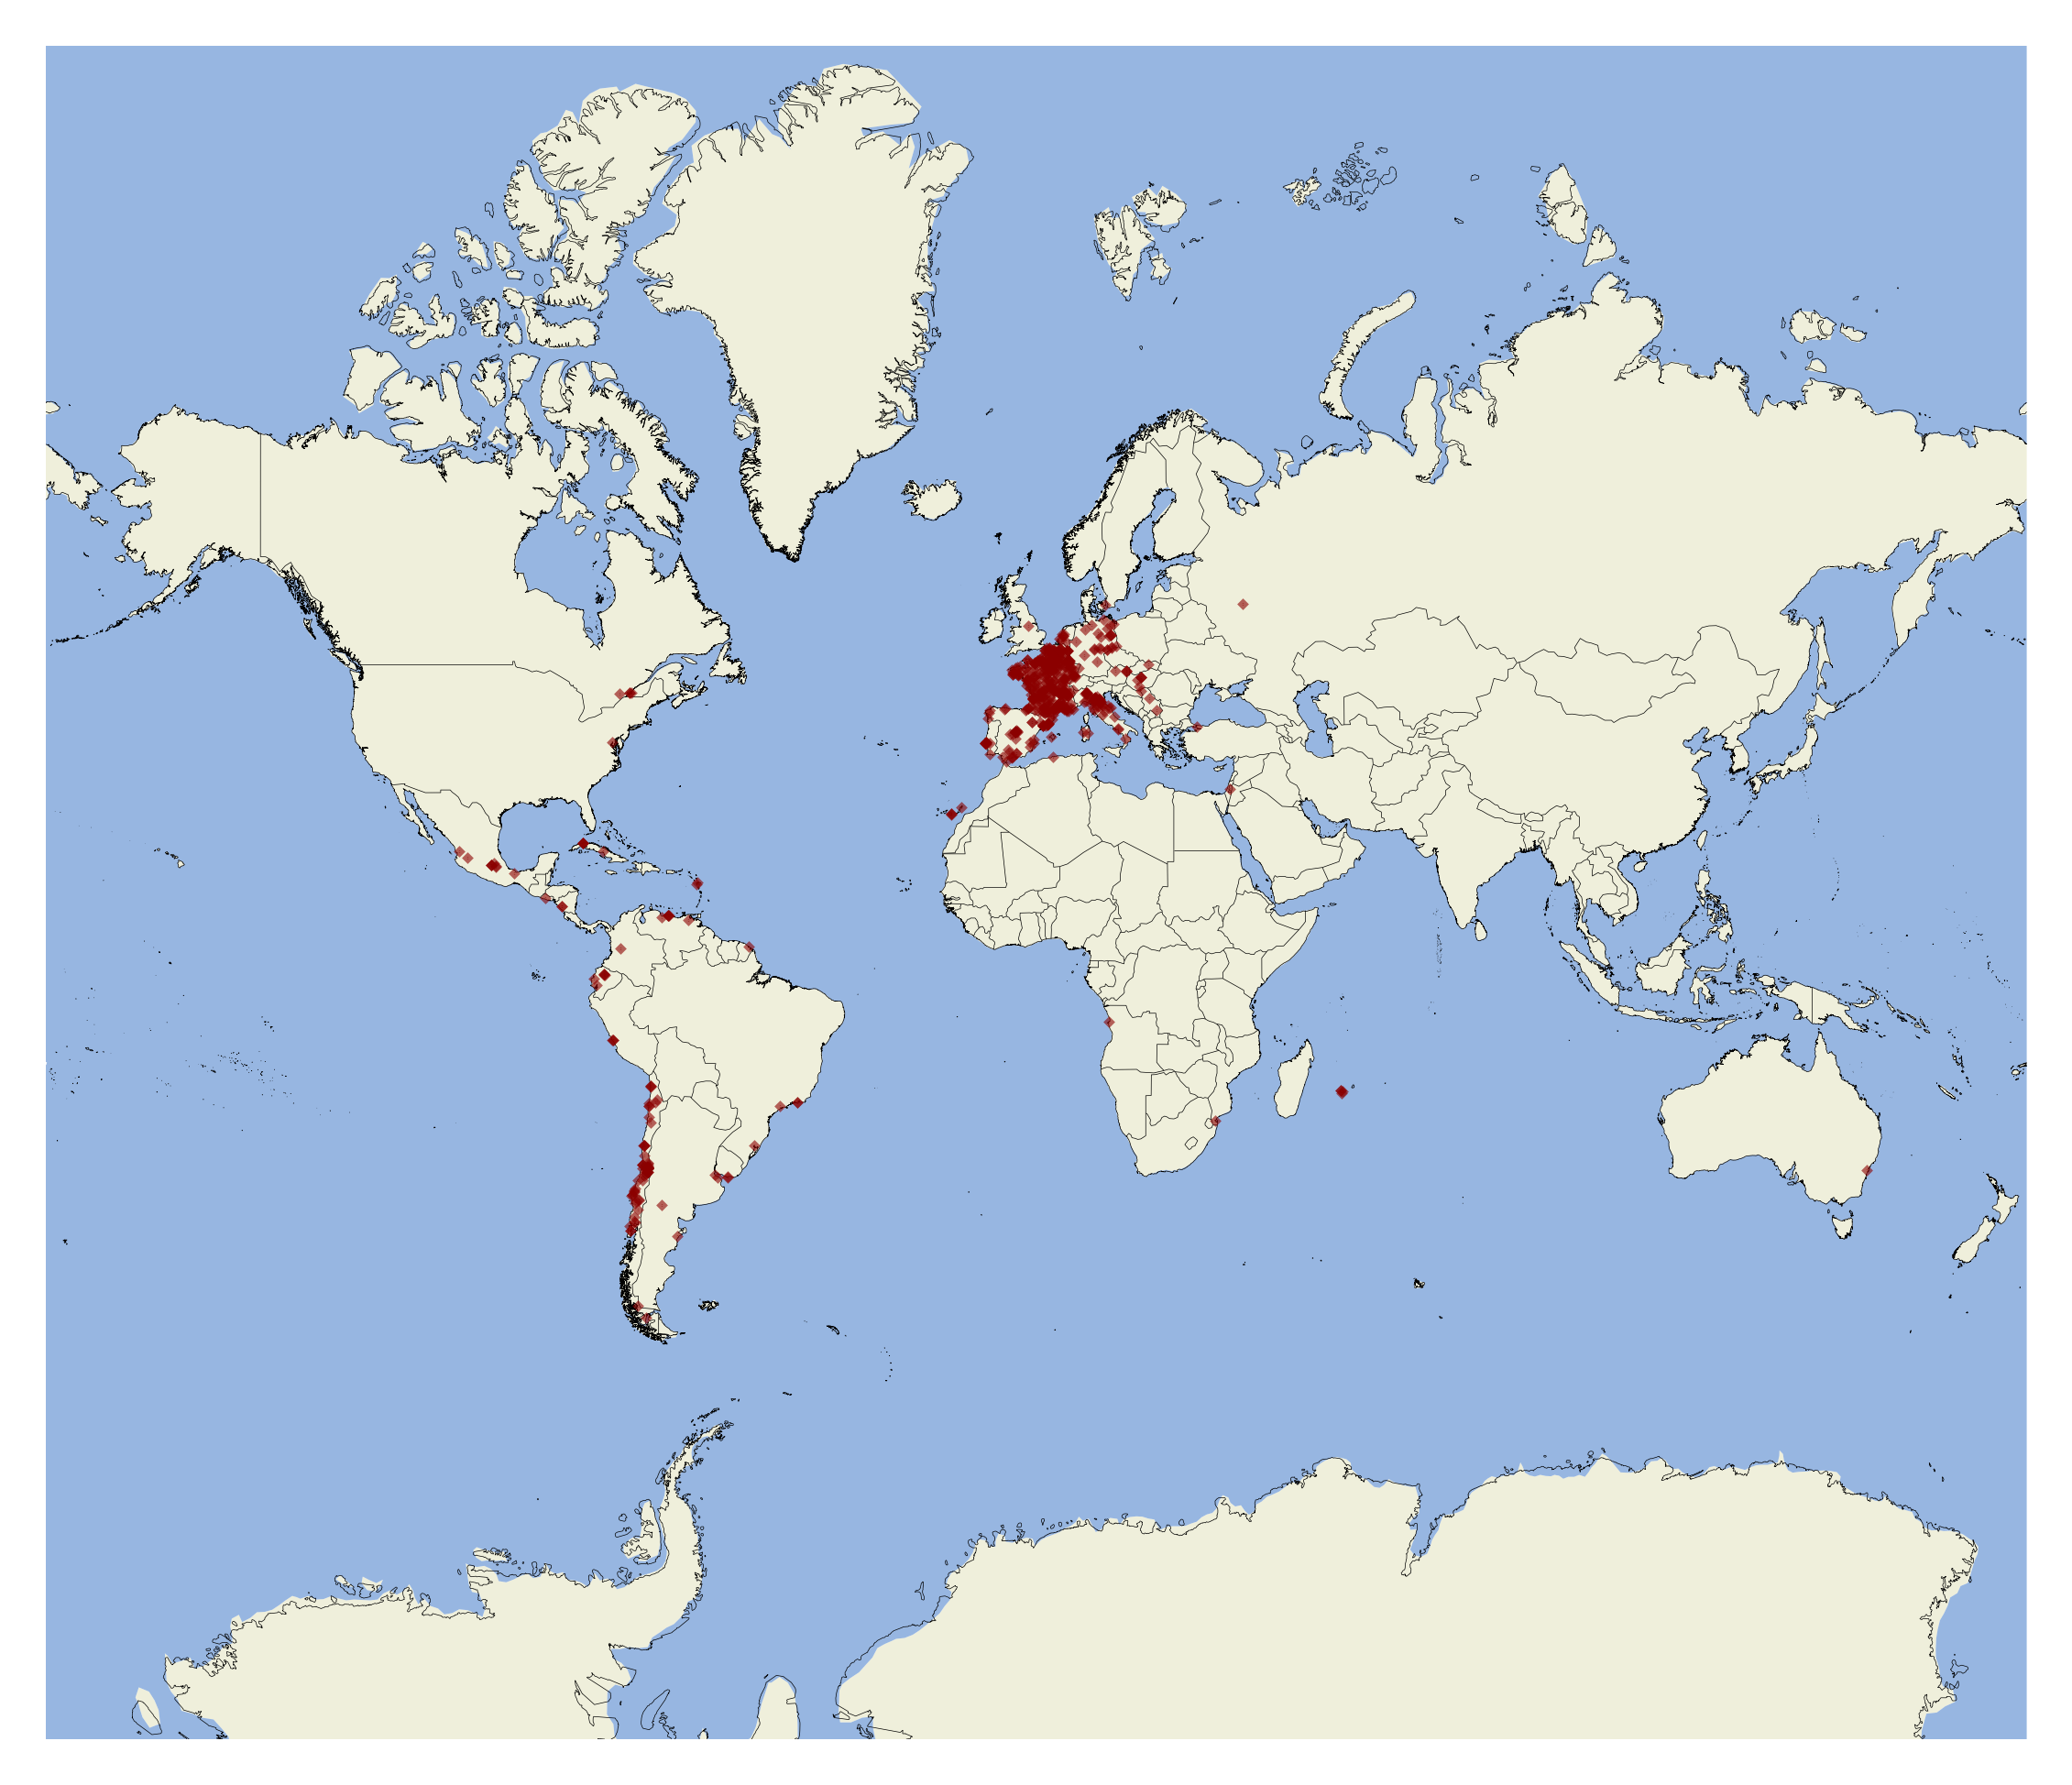

In [9]:
# sort by index number
allende_extant.sort_index(inplace=True)

# get all coordinates
# in pyplot terms, longitude is x and latitude is y
longitudes = allende_extant['longitude'].to_list()
print(longitudes)
print(len(longitudes))
latitudes = allende_extant['latitude'].to_list()
print(latitudes)
print(len(latitudes))

# plot map points on the world map
plt.figure(dpi=500)
ax = plt.axes(projection=ccrs.Mercator(), frameon=False)
ax.set_global()
ax.coastlines(resolution='10m', linewidth=0.1)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linewidth=0.1)
ax.plot(longitudes, latitudes, linestyle='', marker='D', markersize=0.3, color="DarkRed", alpha=0.6, transform=ccrs.PlateCarree())
plt.show()

## Number of extant places in Chile

### By region

[('Región Metropolitana', 29), ('Biobío', 7), ("O'Higgins", 7), ('Los Lagos', 6), ('Valparaíso', 6), ('Antofagasta', 6), ('Coquimbo', 5), ('Araucanía', 4), ('Tarapacá', 3), ('Magallanes y la Antártica Chilena', 2), ('Maule', 2), ('Los Ríos', 1), ('Atacama', 1)]
['Región Metropolitana', 'Biobío', "O'Higgins", 'Los Lagos', 'Valparaíso', 'Antofagasta', 'Coquimbo', 'Araucanía', 'Tarapacá', 'Magallanes', 'Maule', 'Los Ríos', 'Atacama', 'Arica y Parinacota', 'Aysén', 'Ñuble']
[29, 7, 7, 6, 6, 6, 5, 4, 3, 2, 2, 1, 1, 0, 0, 0]
['Región Metropolitana (29)', 'Biobío (7)', "O'Higgins (7)", 'Los Lagos (6)', 'Valparaíso (6)', 'Antofagasta (6)', 'Coquimbo (5)', 'Araucanía (4)', 'Tarapacá (3)', 'Magallanes (2)', 'Maule (2)', 'Los Ríos (1)', 'Atacama (1)', 'Arica y Parinacota (0)', 'Aysén (0)', 'Ñuble (0)']


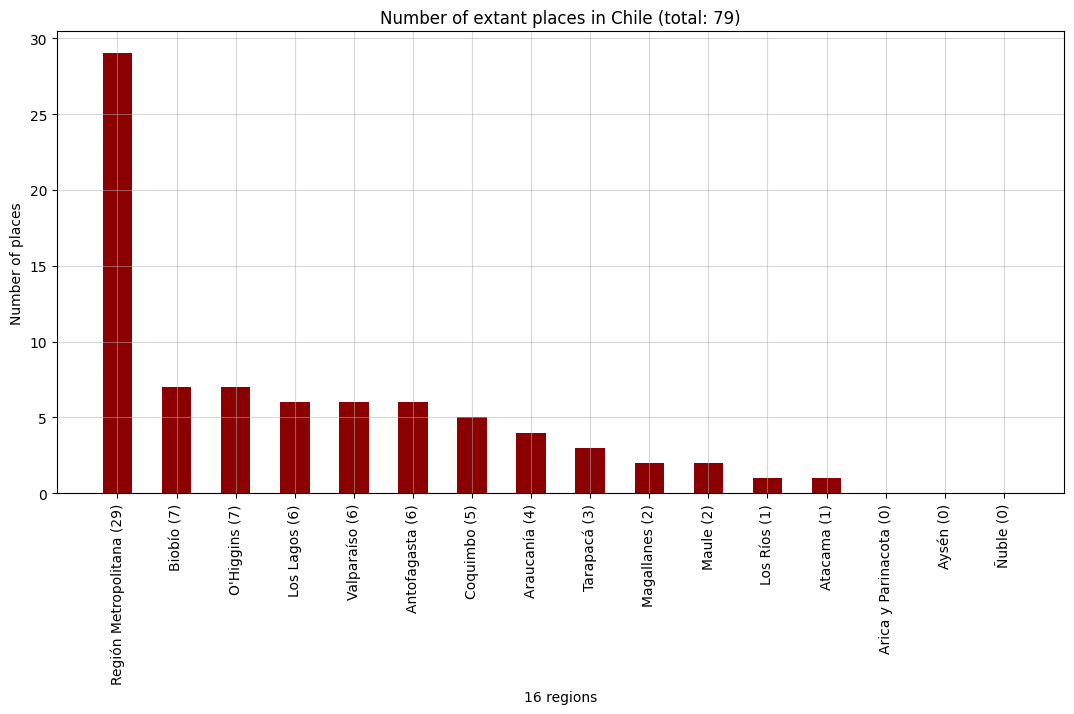

In [10]:
# sort alphabetically by Chilean region
extant_chile.sort_values('locale_1')

# count number of places per Chilean region and sort from greatest to least
extant_chile_regions = Counter(extant_chile['locale_1'].to_list()).most_common()
print(extant_chile_regions)

# complete list of Chilean regions
chile_regions_all = [
    'Antofagasta',
    'Araucanía',
    'Arica y Parinacota',
    'Atacama',
    'Aysén',
    'Biobío',
    'Coquimbo',
    'Los Lagos',
    'Los Ríos',
    'Magallanes',
    'Maule',
    'Ñuble',
    'O\'Higgins',
    'Región Metropolitana',
    'Tarapacá',
    'Valparaíso',
]

# extract unique regions and counts form the list
chile_regions = []
chile_regions_count = []
chile_regions_label = []
for (r, c) in extant_chile_regions:
    if r == 'Magallanes y la Antártica Chilena':
        r = 'Magallanes'
    chile_regions.append(r)
    chile_regions_count.append(c)
    chile_regions_label.append(f'{r} ({c})')
# then add the regions with no records in the list
for r in chile_regions_all:
    if r not in chile_regions:
        chile_regions.append(r)
        chile_regions_count.append(0)
        chile_regions_label.append(f'{r} (0)')
print(chile_regions)
print(chile_regions_count)
print(chile_regions_label)

# now create the bar
plt.figure(figsize=(13,6))
plt.bar(chile_regions_label, chile_regions_count, color="DarkRed", width=0.5)
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.title(f'Number of extant places in Chile (total: {len(extant_chile.index)})')
plt.xlabel(f'{len(chile_regions)} regions')
plt.ylabel('Number of places')
plt.show()

### Metropolitan Region vs. rest of Chile

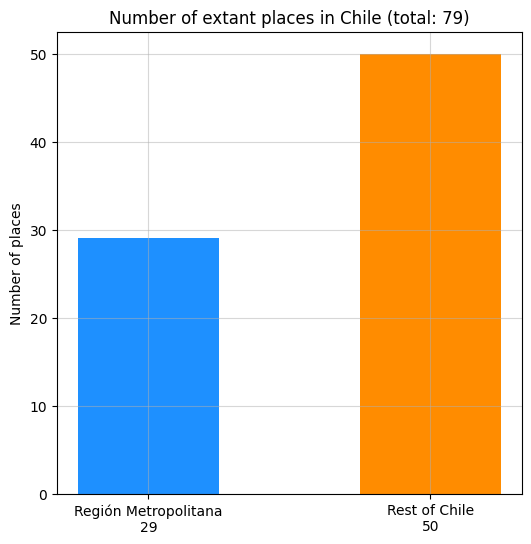

In [11]:
# EXTANT PLACES IN REGIÓN METROPOLITANA (METROPOLITAN REGION)
extant_chile_rm = extant_chile[extant_chile['locale_1'] == 'Región Metropolitana']
extant_chile_rm_count = len(extant_chile_rm.index)
# print(extant_chile_rm)

# EXTANT PLACES IN THE REST OF CHILE
extant_chile_non_rm = extant_chile[extant_chile['locale_1'] != 'Región Metropolitana']
extant_chile_non_rm_count = len(extant_chile_non_rm.index)
# print(extant_chile_non_rm)

# now create the chart
plt.figure(figsize=(6,6))
plt.bar([f'Región Metropolitana\n{extant_chile_rm_count}', f'Rest of Chile\n{extant_chile_non_rm_count}'], 
        [extant_chile_rm_count, extant_chile_non_rm_count], color=colors_chile_vs_world, width=0.5)
plt.grid(alpha=0.5)
plt.title(f'Number of extant places in Chile (total: {len(extant_chile.index)})')
plt.ylabel('Number of places')
plt.show()

### Santiago vs. rest of Metropolitan Region

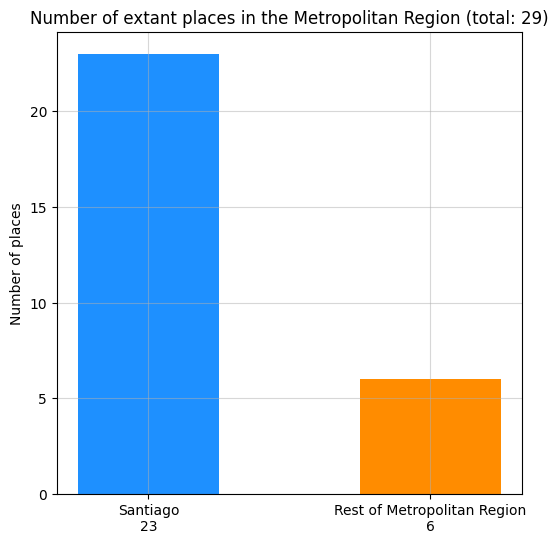

In [12]:
# EXTANT PLACES IN SANTIAGO (PROVINCE)
# FYI: central Santiago is a commune within Santiago Province, but there aren't a lot of Allende places to see in central Santiago
extant_santiago = extant_chile_rm[extant_chile_rm['locale_2'] == 'Santiago']
extant_santiago_count = len(extant_santiago.index)
# print(extant_santiago)

# EXTANT PLACES IN THE REST OF REGIÓN METROPOLITANA
extant_non_santiago = extant_chile_rm[extant_chile_rm['locale_2'] != 'Santiago']
extant_non_santiago_count = len(extant_non_santiago.index)
# print(extant_non_santiago)

# now create the chart
plt.figure(figsize=(6,6))
plt.bar([f'Santiago\n{extant_santiago_count}', f'Rest of Metropolitan Region\n{extant_non_santiago_count}'], 
        [extant_santiago_count, extant_non_santiago_count], color=colors_chile_vs_world, width=0.5)
plt.grid(alpha=0.5)
plt.title(f'Number of extant places in the Metropolitan Region (total: {len(extant_chile_rm.index)})')
plt.ylabel('Number of places')
plt.show()

## Map of extant places in Chile

[-72.9712747726293, -72.3466252540878, -73.0356121031522, -73.6418896321058, -73.1562319084353, -71.2636601599227, -71.2604048114767, -71.2623885171673, -72.9953203065461, -73.7871950587615, -72.4907432302862, -73.8295969310858, -70.1035061078727, -70.6089011600259, -70.5531277170524, -72.3212603382975, -70.6315205227137, -73.7930783161985, -70.6674313732762, -72.7747961559204, -70.6461445, -70.6533755942619, -70.8435331699891, -72.3227763266752, -71.6093916666666, -70.4435988840299, -68.9087923972965, -71.3620668711463, -70.672263404858, -71.6429787679649, -70.7053971905167, -70.7008855359777, -72.4247962090149, -70.768682953129, -70.6385178969369, -70.4726222756861, -71.3381625279867, -70.6617850699904, -70.6534819961992, -70.6534274822897, -70.5869272714999, -70.639595661822, -71.6135618662188, -70.6533997359806, -70.6594003249177, -70.6280947639119, -70.1338750073244, -70.1348352380915, -71.5963477657418, -70.5818779780898, -69.321770831375, -70.632726420451, -70.39207, -72.9564810

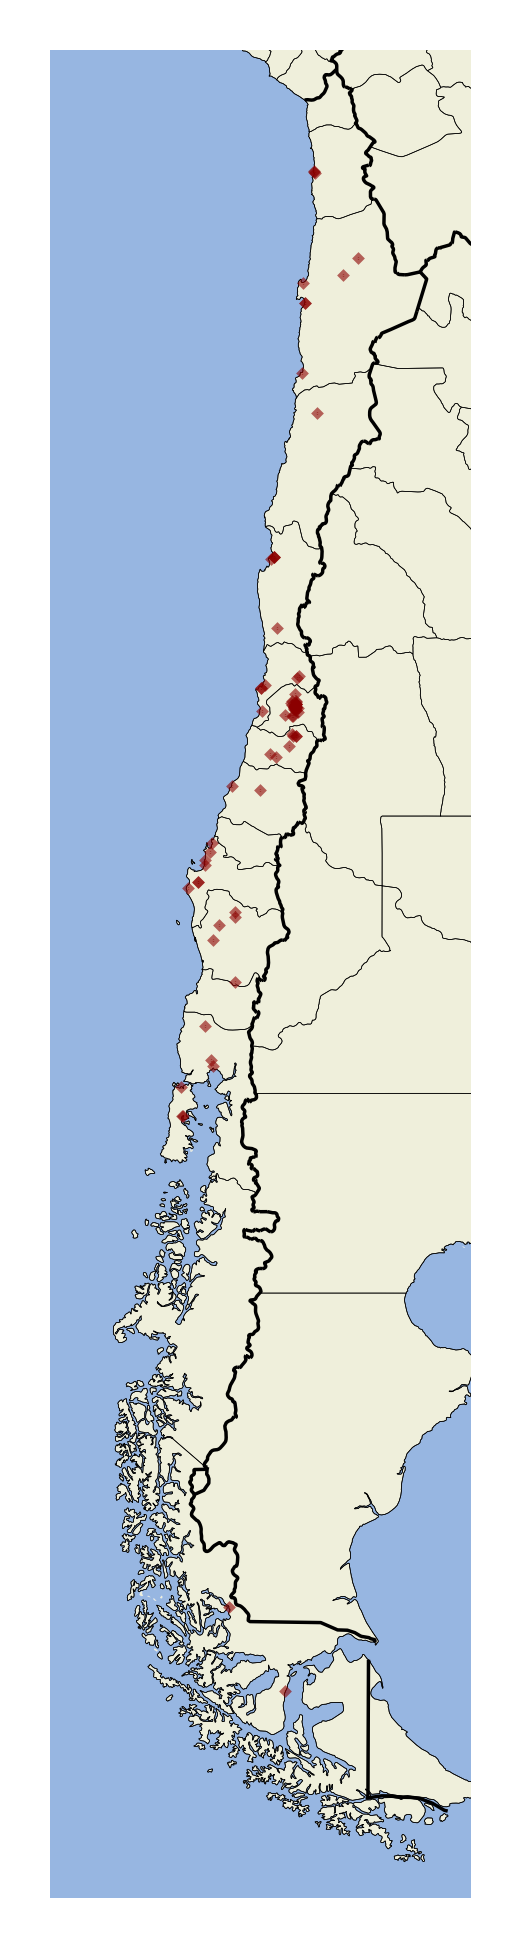

In [13]:
# sort by index number
extant_chile.sort_index()

# get all coordinates
# in pyplot terms, longitude is x and latitude is y
longitudes_chile = extant_chile['longitude'].to_list()
print(longitudes_chile)
print(len(longitudes_chile))
latitudes_chile = extant_chile['latitude'].to_list()
print(latitudes_chile)
print(len(latitudes_chile))

# extreme points of Chile (plus or minus offsets)
# there is a marker aptly called the Northernmost Part of Chile
# https://goo.gl/maps/navxveMtNHhMzkVr8
northernmost_chile = [-17.498532059574565, -69.4685368097291]
# as well as Southernmost Part of Chile
# https://goo.gl/maps/7zpMf2kjDVLcxdCm9
southernmost_chile = [-55.979442422857694, -67.29255365901113]

# draw the map
plt.figure(dpi=500)
ax = plt.axes(projection=ccrs.Mercator(), frameon=False)
ax.coastlines(resolution='10m', linewidth=0.1)
ax.set_extent((northernmost_chile[1]-8, southernmost_chile[1]+1.5, northernmost_chile[0]+0.5, southernmost_chile[0]-0.5))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.STATES, linewidth=0.1)
ax.plot(longitudes_chile, latitudes_chile, linestyle='', marker='D', markersize=0.3, color="DarkRed", alpha=0.6, transform=ccrs.PlateCarree())

plt.show()

## Number of places by `type`

[('street', 560), ('park', 63), ('monument', 30), ('school', 25), ('residential area', 14), ('multipurpose center', 9), ('healthcare facility', 8), ('memorial plate', 7), ('interior', 3), ('public transport station', 3), ('sports center', 3), ('bridge', 2), ('museum', 2), ('government facility', 1), ('library', 1), ('port', 1)]
['street', 'park', 'monument', 'school', 'residential area', 'multipurpose center', 'healthcare facility', 'memorial plate', 'interior', 'public transport station', 'sports center', 'bridge', 'museum', 'government facility', 'library', 'port']
[560, 63, 30, 25, 14, 9, 8, 7, 3, 3, 3, 2, 2, 1, 1, 1]
['street (560)', 'park (63)', 'monument (30)', 'school (25)', 'residential area (14)', 'multipurpose center (9)', 'healthcare facility (8)', 'memorial plate (7)', 'interior (3)', 'public transport station (3)', 'sports center (3)', 'bridge (2)', 'museum (2)', 'government facility (1)', 'library (1)', 'port (1)']


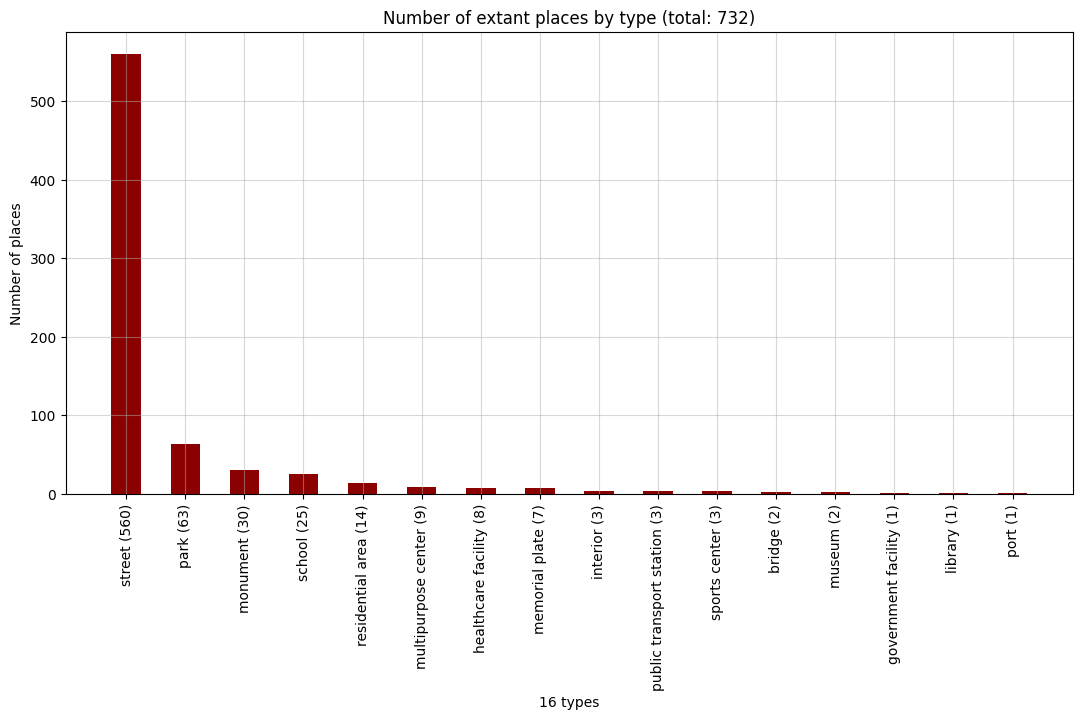

In [14]:
# sort alphabetically by type
allende_extant.sort_values('type', inplace=True)

# count number of places per type and sort from greatest to least
types_count_list = Counter(allende_extant['type'].to_list()).most_common()
print(types_count_list)

# extract unique types and counts
types = []
types_count = []
types_label = []
for (r, c) in types_count_list:
    types.append(r)
    types_count.append(c)
    types_label.append(f'{r} ({c})')
print(types)
print(types_count)
print(types_label)

# now create the bar
plt.figure(figsize=(13,6))
plt.bar(types_label, types_count, color="DarkRed", width=0.5)
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.title(f'Number of extant places by type (total: {len(allende_extant.index)})')
plt.xlabel(f'{len(types)} types')
plt.ylabel('Number of places')
plt.show()

## Timeline of dates of establishment

### All places

range(1965, 2024)
59
Counter({2008: 15, 1973: 15, 2003: 7, 2007: 6, 2006: 5, 2009: 4, 2010: 4, 1999: 4, 2012: 3, 1989: 3, 2005: 3, 2004: 3, 1977: 3, 1993: 3, 1974: 3, 1979: 3, 1981: 3, 2023: 3, 2000: 2, 1996: 2, 1978: 2, 1988: 2, 1980: 2, 1983: 2, 2001: 2, 1984: 2, 1998: 2, 1997: 2, 2011: 1, 1991: 1, 1994: 1, 1965: 1, 1990: 1, 1992: 1, 1985: 1, 1982: 1, 1976: 1, 2014: 1, 2015: 1})
[1, 0, 0, 0, 0, 0, 0, 0, 15, 3, 0, 1, 3, 2, 3, 2, 3, 1, 2, 2, 1, 0, 0, 2, 3, 1, 1, 1, 3, 1, 0, 2, 2, 2, 4, 2, 2, 0, 7, 3, 3, 5, 6, 15, 4, 4, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3]
59


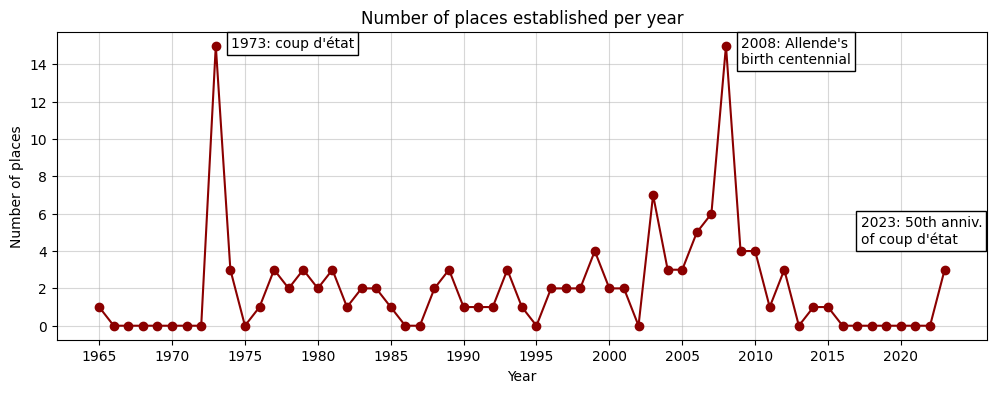

In [15]:
# get only the places where their dates of establishment are certain
# doesn't matter if they're not verified in maps or if they've changed names
dates_est = allende.loc[allende['oldest_known_source'].isin(['desc place','desc abacq','desc implied','desc other'])]
# print(dates_est)

# X-AXIS: A LIST OF YEARS
# get all the oldest_known_years
x_init = dates_est['oldest_known_year'].to_list()
# create a list of every year from 1965 to 2015
x_all = range(min(x_init), max(x_init)+1)
print(x_all)
print(len(x_all))

# Y-AXIS: NUMBER OF ESTABLISHMENTS PER YEAR
# count number of establishments per year
x_count = Counter(x_init)
print(x_count)
# extract the counts
y_all = []
for x in x_all:
    y_all.append(x_count[x])
print(y_all)
print(len(y_all))

# convert x and y axes into numpy arrays for plt's use
x_all = np.array(x_all)
y_all = np.array(y_all)

# now create the plot
plt.figure(figsize=(12,4))
plt.plot(x_all, y_all, color='DarkRed', marker='o')
plt.xticks(np.arange(1965, 2023, step=5))
plt.yticks(np.arange(0, 15, step=2))
plt.grid(alpha=0.5)
plt.title('Number of places established per year')
plt.xlabel('Year')
plt.ylabel('Number of places')
plt.annotate('1973: coup d\'état', xy=(1973,15), textcoords='offset pixels', xytext=(15,-2), bbox=dict(boxstyle="square,pad=0.3",
                      facecolor="white"))
plt.annotate('2008: Allende\'s\nbirth centennial', xy=(2008,15), textcoords='offset pixels', xytext=(15,-18), bbox=dict(boxstyle="square,pad=0.3",
                      facecolor="white"))
plt.annotate('2023: 50th anniv.\nof coup d\'état', xy=(2023,2), textcoords='offset pixels', xytext=(-84,45), bbox=dict(boxstyle="square,pad=0.3",
                      facecolor="white"))
plt.show()

### Chile vs. rest of the world

range(1965, 2024)
59
Counter({2008: 6, 2006: 3, 2023: 2, 2012: 1, 2011: 1, 2007: 1, 2009: 1, 2010: 1, 2000: 1, 1996: 1, 1991: 1, 2015: 1})
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 6, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2]
59
range(1965, 2024)
59
Counter({1973: 15, 2008: 9, 2003: 7, 2007: 5, 1999: 4, 1989: 3, 2005: 3, 2004: 3, 1977: 3, 1993: 3, 2009: 3, 1974: 3, 2010: 3, 1979: 3, 1981: 3, 1978: 2, 2012: 2, 1988: 2, 1980: 2, 1983: 2, 2006: 2, 2001: 2, 1984: 2, 1998: 2, 1997: 2, 1994: 1, 1965: 1, 2000: 1, 1990: 1, 1992: 1, 1985: 1, 1982: 1, 1996: 1, 1976: 1, 2014: 1, 2023: 1})
[1, 0, 0, 0, 0, 0, 0, 0, 15, 3, 0, 1, 3, 2, 3, 2, 3, 1, 2, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 0, 1, 2, 2, 4, 1, 2, 0, 7, 3, 3, 2, 5, 9, 3, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
59


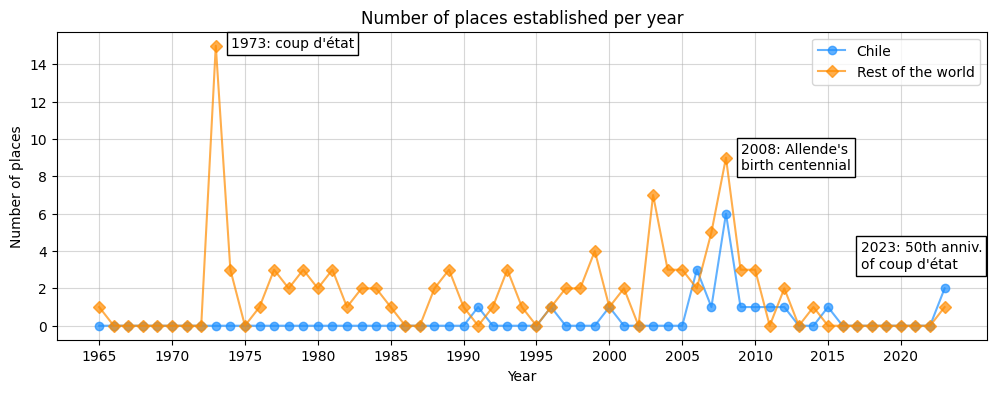

In [16]:
# PLACES IN CHILE
dates_est_chile = dates_est[dates_est['country'] == 'Chile']
# print(dates_est_chile)

# X-AXIS: A LIST OF YEARS
# get all the oldest_known_years
x_init_chile = dates_est_chile['oldest_known_year'].to_list()
# create a list of every year from 1965 to 2015
x_chile = range(min(x_init), max(x_init)+1)
print(x_chile)
print(len(x_chile))

# Y-AXIS: NUMBER OF ESTABLISHMENTS PER YEAR
# count number of establishments per year
x_count_chile = Counter(x_init_chile)
print(x_count_chile)
# extract the counts
y_chile = []
for x in x_chile:
    y_chile.append(x_count_chile[x])
print(y_chile)
print(len(y_chile))


# PLACES OUTSIDE CHILE
dates_est_non_chile = dates_est[dates_est['country'] != 'Chile']
# print(dates_est_non_chile)

# X-AXIS: A LIST OF YEARS
# get all the oldest_known_years
x_init_non_chile = dates_est_non_chile['oldest_known_year'].to_list()
# create a list of every year from 1965 to 2015
x_non_chile = range(min(x_init), max(x_init)+1)
print(x_non_chile)
print(len(x_non_chile))

# Y-AXIS: NUMBER OF ESTABLISHMENTS PER YEAR
# count number of establishments per year
x_count_non_chile = Counter(x_init_non_chile)
print(x_count_non_chile)
# extract the counts
y_non_chile = []
for x in x_non_chile:
    y_non_chile.append(x_count_non_chile[x])
print(y_non_chile)
print(len(y_non_chile))


# convert x and y axes into numpy arrays for plt's use
x_chile = np.array(x_chile)
y_chile = np.array(y_chile)

x_non_chile = np.array(x_non_chile)
y_non_chile = np.array(y_non_chile)

# now create the plot
plt.figure(figsize=(12,4))
plt.plot(x_chile, y_chile, marker='o', alpha=0.7, label='Chile', color=colors_chile_vs_world[0])
plt.plot(x_non_chile, y_non_chile, marker='D', alpha=0.7, label='Rest of the world', color=colors_chile_vs_world[1])
plt.xticks(np.arange(1965, 2023, step=5))
plt.yticks(np.arange(0, 15, step=2))
plt.grid(alpha=0.5)
plt.title('Number of places established per year')
plt.xlabel('Year')
plt.ylabel('Number of places')
plt.annotate('1973: coup d\'état', xy=(1973,15), textcoords='offset pixels', xytext=(15,-2), bbox=dict(boxstyle="square,pad=0.3",
                      facecolor="white"))
plt.annotate('2008: Allende\'s\nbirth centennial', xy=(2008,15), textcoords='offset pixels', xytext=(15,-124), bbox=dict(boxstyle="square,pad=0.3",
                      facecolor="white"))
plt.annotate('2023: 50th anniv.\nof coup d\'état', xy=(2023,2), textcoords='offset pixels', xytext=(-84,20), bbox=dict(boxstyle="square,pad=0.3",
                      facecolor="white"))
plt.legend(loc='upper right')
plt.show()

### Chile vs. France vs. rest of the world

range(1965, 2024)
59
Counter({1973: 3, 1981: 2, 2003: 2, 1978: 1, 1989: 1, 1977: 1, 1980: 1, 1982: 1, 1984: 1, 1996: 1, 1993: 1, 2006: 1, 2007: 1, 1979: 1, 1976: 1})
[0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
59
range(1965, 2024)
59
Counter({1973: 12, 2008: 9, 2003: 5, 2007: 4, 1999: 4, 2005: 3, 2004: 3, 2009: 3, 1974: 3, 2010: 3, 2012: 2, 1988: 2, 1977: 2, 1989: 2, 1993: 2, 1983: 2, 2001: 2, 1979: 2, 1998: 2, 1997: 2, 1994: 1, 1965: 1, 2000: 1, 1978: 1, 1980: 1, 1990: 1, 2006: 1, 1984: 1, 1981: 1, 1992: 1, 1985: 1, 2014: 1, 2023: 1})
[1, 0, 0, 0, 0, 0, 0, 0, 12, 3, 0, 0, 2, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0, 0, 2, 2, 4, 1, 2, 0, 5, 3, 3, 1, 4, 9, 3, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
59


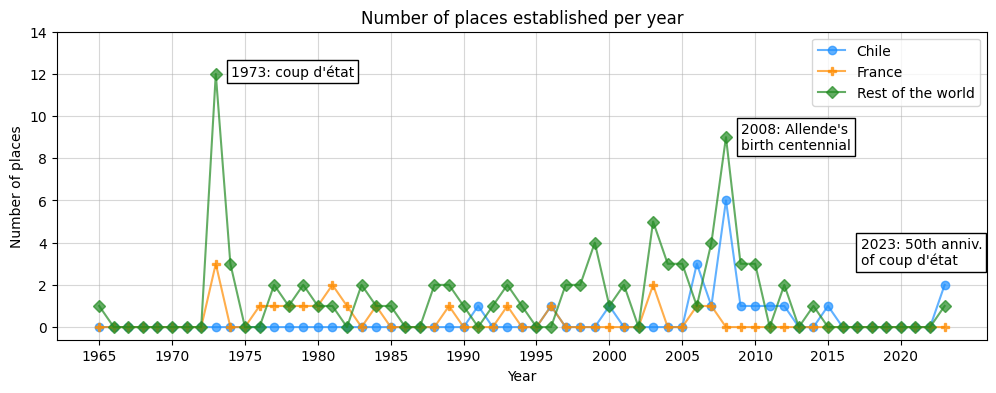

In [17]:
# PLACES IN FRANCE
dates_est_france = dates_est[dates_est['country'] == 'France']
# print(dates_est_france)

# X-AXIS: A LIST OF YEARS
# get all the oldest_known_years
x_init_france = dates_est_france['oldest_known_year'].to_list()
# create a list of every year from 1965 to 2015
x_france = range(min(x_init), max(x_init)+1)
print(x_france)
print(len(x_france))

# Y-AXIS: NUMBER OF ESTABLISHMENTS PER YEAR
# count number of establishments per year
x_count_france = Counter(x_init_france)
print(x_count_france)
# extract the counts
y_france = []
for x in x_france:
    y_france.append(x_count_france[x])
print(y_france)
print(len(y_france))


# PLACES OUTSIDE CHILE AND FRANCE
dates_est_non_chile_france = dates_est_non_chile[dates_est_non_chile['country'] != 'France']
# print(dates_est_non_chile)

# X-AXIS: A LIST OF YEARS
# get all the oldest_known_years
x_init_non_chile_france = dates_est_non_chile_france['oldest_known_year'].to_list()
# create a list of every year from 1965 to 2015
x_non_chile_france = range(min(x_init), max(x_init)+1)
print(x_non_chile_france)
print(len(x_non_chile_france))

# Y-AXIS: NUMBER OF ESTABLISHMENTS PER YEAR
# count number of establishments per year
x_count_non_chile_france = Counter(x_init_non_chile_france)
print(x_count_non_chile_france)
# extract the counts
y_non_chile_france = []
for x in x_non_chile_france:
    y_non_chile_france.append(x_count_non_chile_france[x])
print(y_non_chile_france)
print(len(y_non_chile_france))


# convert x and y axes into numpy arrays for plt's use
x_france = np.array(x_france)
y_france = np.array(y_france)

x_non_chile_france = np.array(x_non_chile_france)
y_non_chile_france = np.array(y_non_chile_france)

# now create the plot
plt.figure(figsize=(12,4))
plt.plot(x_chile, y_chile, marker='o', alpha=0.7, label='Chile', color=colors_chile_vs_world[0])
plt.plot(x_france, y_france, marker='P', alpha=0.7, label='France', color=colors_chile_vs_world[1])
plt.plot(x_non_chile_france, y_non_chile_france, marker='D', alpha=0.7, label='Rest of the world', color=colors_chile_vs_world[2])
plt.xticks(np.arange(1965, 2023, step=5))
plt.yticks(np.arange(0, 15, step=2))
plt.grid(alpha=0.5)
plt.title('Number of places established per year')
plt.xlabel('Year')
plt.ylabel('Number of places')
plt.annotate('1973: coup d\'état', xy=(1973,12), textcoords='offset pixels', xytext=(15,-2), bbox=dict(boxstyle="square,pad=0.3",
                      facecolor="white"))
plt.annotate('2008: Allende\'s\nbirth centennial', xy=(2008,9), textcoords='offset pixels', xytext=(15,-12), bbox=dict(boxstyle="square,pad=0.3",
                      facecolor="white"))
plt.annotate('2023: 50th anniv.\nof coup d\'état', xy=(2023,2), textcoords='offset pixels', xytext=(-84,20), bbox=dict(boxstyle="square,pad=0.3",
                      facecolor="white"))
plt.legend(loc='upper right')
plt.show()

## How Allende died

[('assassination', 33), ('unspecified', 20), ('weapon on hand', 2), ('suicide', 1)]
['assassination', 'unspecified', 'weapon on hand', 'suicide']
[33, 20, 2, 1]
['assassination\n33', 'unspecified\n20', 'weapon on hand\n2', 'suicide\n1']


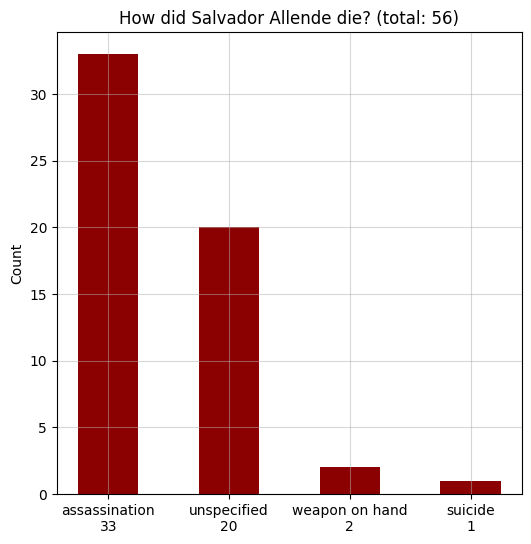

In [18]:
# extract all places that mention Allende's death
death = allende[~allende['how_allende_died'].isna()]
# print(death)

# count death methods and sort from greatest to least
death_count = Counter(death['how_allende_died'].to_list()).most_common()
print(death_count)

# extract unique regions and counts
death_method = []
death_method_count = []
death_method_label = []
for (r, c) in death_count:
    death_method.append(r)
    death_method_count.append(c)
    death_method_label.append(f'{r}\n{c}')
print(death_method)
print(death_method_count)
print(death_method_label)

# now create the chart
plt.figure(figsize=(6,6))
plt.bar(death_method_label, death_method_count, color="DarkRed", width=0.5)
plt.grid(alpha=0.5)
plt.title(f'How did Salvador Allende die? (total: {len(death.index)})')
plt.ylabel('Count')
plt.show()